# Diabetes Prediction


**Goal:** The aim of this project is to explore the use of ML algorithms to predict the likelihood of an individual developing diabetes. This data is from the Behavioral Risk Factor Surveillance System (BRFSS) for 2020 and the data is available here: https://www.cdc.gov/brfss/annual_data/annual_2020.html



In [2]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics
import io
import time
#from sas7bdat import SAS7BDAT
sns.set(style='ticks')
sns.set_style("darkgrid")

## 1. Importing Data

In [3]:
#Data is an SAS file in SAS Transport file format (xport)
df = pd.read_sas("LLCP2020.XPT ", format='xport')

## 2. Cleaning up Data for Exploration

In [4]:
#Check top 5 rows and increase the max number of columns to see all the columns
pd.set_option("display.max_columns", 400)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000001',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,69.640207,1.0,69.640207,1.0,NaN,NaN,NaN,NaN,1.0,0.465411,460.002849,284.335672,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0,1.0,9.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,b'02072020',b'02',b'07',b'2020',1200.0,b'2020000002',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN

In [5]:
#Check the shape of the data
#So we have 401,958 rows and 279 Columns
df.shape

(401958, 279)

In [6]:
#I will not take a quick look at some basic statistics
#Already I am seeing that there are a couple of columns with lots of missing data
df.describe()

,_STATE,FMONTH,DISPCODE,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
count,401958.000000,401958.000000,401958.000000,4.019580e+05,124751.0,124751.000000,23.0,124751.0,124751.0,124751.000000,23.000000,124742.000000,5.144900e+04,1.104220e+05,1.104220e+05,47426.000000,277207.0,277207.0,277207.0,277203.0,277187.000000,277206.000000,979.0,277200.000000,277206.000000,277205.000000,401958.000000,401950.000000,401953.000000,401953.000000,201615.000000,401955.000000,401955.000000,401955.000000,401953.000000,401955.000000,401955.000000,401952.000000,401955.000000,401955.000000,401955.000000,54141.000000,401955.000000,401955.000000,401953.000000,401953.000000,401952.000000,401952.000000,401952.000000,52094.000000,401951.000000,401951.000000,401946.000000,401946.000000,401943.000000,124746.000000,30250.000000,401842.000000,400651.000000,399033.000000,397191.000000,394600.000000,75590.000000,392106.000000,391134.000000,389543.000000,388634.000000,387607.000000,386678.000000,386066.000000,385189.000000,384098.000000,156634.000000,52423.000000,103725.000000,383465.000000,381031.000000,190859.000000,190332.000000,189846.000000,378433.000000,196928.000000,236084.000000,377521.000000,264150.000000,68636.000000,376447.000000,193528.000000,203520.000000,156512.000000,203016.000000,186520.000000,202570.000000,65465.000000,200268.000000,126565.000000,126336.000000,126076.000000,125915.000000,58363.000000,58251.000000,258555.000000,181355.000000,258031.000000,31888.000000,257565.000000,83096.000000,257044.000000,18386.000000,256505.000000,11221.000000,367921.000000,116822.000000,366026.000000,218942.000000,218993.000000,13109.000000,13108.000000,13108.000000,13108.000000,13108.000000,13033.00000,13108.00

In [7]:
# Using some domain knowledge I will select some features that might have an effect on the development of diabetes.
# This is the first stage. In the future better techniques will be used for feature selection
#This pdf describes the features, so it will be used to understand the variable names (https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf)
# This link also gives you the list of variables (https://www.cdc.gov/brfss/annual_data/2020/summary_matrix_20.html)
columns = ["DIABETE4","PREDIAB1", "_AGE_G","_RACE", "_SEX", "EDUCA", "INCOME2", "MARITAL", "GENHLTH", "PHYSHLTH", "HLTHPLN1", "EXERANY2", "_SMOKER3", "_RFBING5", "_TOTINDA",
          "MEDCOST", "_RFBMI5", "_MICHD" ]


PDF describing features: (https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf)

Summary Table of Variables: (https://www.cdc.gov/brfss/annual_data/2020/summary_matrix_20.html)

- DIABETE4 - Whether the correspondent have diabetes
- PREDIAB1 - Whether the correspondent has prediabetes or borderline
- _AGE_G - Six-level imputed age category
- _RACE - Race/Ethnicity
- _SEX - Birth Sex
- ECUCA - Highest grade or school completed
- INCOME2 - Annual household income
- MARITAL - Marital Status
- GENHLTH - General Health
- PHYSHLTH - Physical Health
- HLTHPLN1 - Health Coverage/Insurance
- EXERANY2 - Exercise in the past month
- _SMOKER3 - Whether a Smoker/Type of Smoker
- _RFBING5 - Whether a Drinker/Type of Drinker
- _TOTINDA - Physical Activity
- MEDCOST - Whether you can affort medical cost
- _RFBMI5 -Overweight or Obese based on BMI
- _MICHD - coronary heart disease (CHD) or myocardial infarction (MI)

In [8]:
#create new dataframe with selelcted features
df_selected=  df[columns]

In [9]:
#check new dataframe
df_selected.head()

,DIABETE4,PREDIAB1,_AGE_G,_RACE,_SEX,EDUCA,INCOME2,MARITAL,GENHLTH,PHYSHLTH,HLTHPLN1,EXERANY2,_SMOKER3,_RFBING5,_TOTINDA,MEDCOST,_RFBMI5,_MICHD
0,1.0,NaN,5.0,1.0,2.0,6.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1,3.0,1.0,6.0,2.0,2.0,6.0,99.0,3.0,3.0,88.0,1.0,1.0,9.0,9.0,1.0,1.0,2.0,2.0
2,3.0,3.0,6.0,2.0,2.0,5.0,7.0,1.0,3.0,88.0,1.0,1.0,4.0,1.0,1.0,2.0,9.0,2.0
3,3.0,3.0,6.0,1.0,2.0,4.0,99.0,3.0,1.0,88.0,1.0,2.0,4.0,1.0,2.0,2.0,9.0,2.0
4,3.0,3.0,6.0,1.0,2.0,6.0,77.0,3.0,2.0,88.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0


In [10]:
#double check shape
df_selected.shape

(401958, 18)

In [11]:
#check missing value and it's quite a bit of missing values. 
#calling is sum twice will sum both columns and rows. 
df_selected.isnull().sum().sum()

193947

In [12]:
#check which columns has the most missing values
# I see that prediabetes have the most missing values.
#Income second although far below prediabetes and then _MICHD (heart issues)
df_selected.isnull().sum()

DIABETE4         6
PREDIAB1    182965
_AGE_G           0
_RACE            1
_SEX             0
EDUCA           12
INCOME2       7358
MARITAL         12
GENHLTH          8
PHYSHLTH         5
HLTHPLN1         3
EXERANY2         3
_SMOKER3         0
_RFBING5         0
_TOTINDA         0
MEDCOST          3
_RFBMI5          0
_MICHD        3571
dtype: int64

In [13]:
#I will drop prediab for now and EXERANY2 (_TOTINDA is calculated from  EXERANY2)
cols_to_drop = ["PREDIAB1", "EXERANY2"]
df_revised2 = df_selected.drop(cols_to_drop, axis=1)
df_revised2.isnull().sum()


DIABETE4       6
_AGE_G         0
_RACE          1
_SEX           0
EDUCA         12
INCOME2     7358
MARITAL       12
GENHLTH        8
PHYSHLTH       5
HLTHPLN1       3
_SMOKER3       0
_RFBING5       0
_TOTINDA       0
MEDCOST        3
_RFBMI5        0
_MICHD      3571
dtype: int64

In [14]:
#Drop missing values now and see.
#Well, we have 391,103 records and 15 columns
df_revised2 = df_revised2.dropna()
df_revised2.shape

(391103, 16)

In [15]:
#view data again
df_revised2.head()

,DIABETE4,_AGE_G,_RACE,_SEX,EDUCA,INCOME2,MARITAL,GENHLTH,PHYSHLTH,HLTHPLN1,_SMOKER3,_RFBING5,_TOTINDA,MEDCOST,_RFBMI5,_MICHD
0,1.0,5.0,1.0,2.0,6.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
1,3.0,6.0,2.0,2.0,6.0,99.0,3.0,3.0,88.0,1.0,9.0,9.0,1.0,1.0,2.0,2.0
2,3.0,6.0,2.0,2.0,5.0,7.0,1.0,3.0,88.0,1.0,4.0,1.0,1.0,2.0,9.0,2.0
3,3.0,6.0,1.0,2.0,4.0,99.0,3.0,1.0,88.0,1.0,4.0,1.0,2.0,2.0,9.0,2.0
4,3.0,6.0,1.0,2.0,6.0,77.0,3.0,2.0,88.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0


In [16]:
#I will now do a value count for the label before I start changing so that I can verify if the change is correct.
#count values
df_revised2['DIABETE4'].value_counts()


3.0    328434
1.0     50519
4.0      8342
2.0      3301
7.0       418
9.0        89
Name: DIABETE4, dtype: int64

In [17]:
#We want to have or dependent variable (y) to be categorized as follows:
# 0 for no diabetes diabetes | 1 diabetes. Based on the support document,

#we also have 7 and 9 for don't know and refused. These can be deleted.
#df_revised2['DIABETE4'] = df_revised2['DIABETE4'].replace({2:0, 3:0,4:0})
df_revised2['DIABETE4']= df_revised2.loc[:,['DIABETE4']].replace({2:0, 3:0,4:0})
df_revised2 = df_revised2[df_revised2.DIABETE4 != 7]
df_revised2 = df_revised2[df_revised2.DIABETE4 != 9]
df_revised2 = df_revised2[df_revised2.DIABETE4 != 2] # taken diabetes during pregnancy. This will not affect the balance male vs female since we already have more female participants

#check the set of values in column
df_revised2['DIABETE4'].unique()



array([1., 0.])

In [18]:
#check a sample
df_revised2.head()

,DIABETE4,_AGE_G,_RACE,_SEX,EDUCA,INCOME2,MARITAL,GENHLTH,PHYSHLTH,HLTHPLN1,_SMOKER3,_RFBING5,_TOTINDA,MEDCOST,_RFBMI5,_MICHD
0,1.0,5.0,1.0,2.0,6.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
1,0.0,6.0,2.0,2.0,6.0,99.0,3.0,3.0,88.0,1.0,9.0,9.0,1.0,1.0,2.0,2.0
2,0.0,6.0,2.0,2.0,5.0,7.0,1.0,3.0,88.0,1.0,4.0,1.0,1.0,2.0,9.0,2.0
3,0.0,6.0,1.0,2.0,4.0,99.0,3.0,1.0,88.0,1.0,4.0,1.0,2.0,2.0,9.0,2.0
4,0.0,6.0,1.0,2.0,6.0,77.0,3.0,2.0,88.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0


In [19]:
#count values
#all seems to be ok with the value count check
df_revised2['DIABETE4'].value_counts()

0.0    340077
1.0     50519
Name: DIABETE4, dtype: int64

In [20]:
#Perusing the support document and the code above I need to categorize many values and removing some. 
#This is an adapted version of code on kaggle for the 2015 survey (https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system/code).
#I wanted to remove the copywarning so I used loc in the definition
#I will now write a general function to achieve this.
#parameters needed: Column (String), Dictionary of value and what to replace and also the values to remove.
def Categorize_and_Remove_v2(thedf, cname, cdict={},ntorem=[]):
  mydf = None
  mydf = thedf
  if cdict:
    mydf[cname]= df_revised2.loc[:,[cname]].replace(cdict)
  if ntorem:
    for i in ntorem:
      mydf = mydf[mydf[cname] != i]
  return mydf

#Using the function to categorizing and moving the others
#change 2 to 0 fro physical activity and remove 9
#test2 = Categorize_and_Remove_v2(df_revised2, 'DIABETE4',{2:0, 3:0,4:0},[7,9,2])
#test2['DIABETE4'].unique()

In [21]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
df_revised3 = Categorize_and_Remove_v2(df_revised2, '_RACE',{},[9])
df_revised3['_RACE'].value_counts()

1.0    288924
8.0     34918
2.0     28958
4.0      9734
7.0      8068
3.0      6523
6.0      3202
5.0      1949
Name: _RACE, dtype: int64

In [22]:
#Using the function to categorizing and moving the others
#change 2 to 0  
df_revised4 = Categorize_and_Remove_v2(df_revised3, '_SEX',{2:0})
df_revised4['_SEX'].value_counts()

0.0    208260
1.0    174016
Name: _SEX, dtype: int64

In [23]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
df_revised5 = Categorize_and_Remove_v2(df_revised4, 'EDUCA',{},[9])
df_revised5['EDUCA'].value_counts()

6.0    148801
5.0    106416
4.0    101624
3.0     16428
2.0      7440
1.0       507
Name: EDUCA, dtype: int64

In [24]:
#Using the function to categorizing and moving the others
#remove 77 and 99 (don't now and refused)
df_revised6 = Categorize_and_Remove_v2(df_revised5, 'INCOME2',{},[77,99])
df_revised6['INCOME2'].value_counts()

8.0    116676
7.0     51444
6.0     42821
5.0     30510
4.0     26919
3.0     20385
2.0     13180
1.0     12351
Name: INCOME2, dtype: int64

In [25]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
df_revised7 = Categorize_and_Remove_v2(df_revised6, 'MARITAL',{},[9])
df_revised7['MARITAL'].value_counts()

1.0    166253
5.0     54716
2.0     42309
3.0     31034
6.0     12631
4.0      6319
Name: MARITAL, dtype: int64

In [26]:
#Using the function to categorizing and moving the others
#remove 7 and 9 (don't now and refused)
df_revised8 = Categorize_and_Remove_v2(df_revised7, 'GENHLTH',{},[7,9])
df_revised8['GENHLTH'].value_counts()

2.0    110162
3.0     91826
1.0     64447
4.0     34961
5.0     11406
Name: GENHLTH, dtype: int64

In [27]:
#Using the function to categorizing and moving the others
#change 88 to 0  remove 77 and 99
df_revised9 = Categorize_and_Remove_v2(df_revised8, 'PHYSHLTH',{88:0},[77,99])
df_revised9['PHYSHLTH'].value_counts()

0.0     216886
30.0     19019
2.0      14582
1.0      10214
3.0       8410
5.0       7400
10.0      5333
15.0      4830
7.0       4481
4.0       4323
20.0      3173
14.0      2774
6.0       1230
25.0      1123
8.0        911
21.0       600
12.0       596
28.0       447
29.0       199
9.0        188
18.0       176
16.0       134
27.0       126
17.0       100
13.0        87
11.0        85
22.0        85
24.0        68
26.0        60
23.0        47
19.0        35
Name: PHYSHLTH, dtype: int64

In [28]:
#Using the function to categorizing and moving the others
#remove 7 and 9
df_revised10 = Categorize_and_Remove_v2(df_revised9, 'HLTHPLN1',{},[7,9])
df_revised10['HLTHPLN1'].value_counts()

1.0    282117
2.0     24876
Name: HLTHPLN1, dtype: int64

In [29]:
#Using the function to categorizing and moving the others
#remove 9
df_revised11 = Categorize_and_Remove_v2(df_revised10, '_SMOKER3',{},[9])
df_revised11['_SMOKER3'].value_counts()

4.0    174058
3.0     82706
1.0     30868
2.0     11569
Name: _SMOKER3, dtype: int64

In [30]:
#Using the function to categorizing and moving the others
#remove 9
df_revised12 = Categorize_and_Remove_v2(df_revised11, '_RFBING5',{},[9])
df_revised12['_RFBING5'].value_counts()

1.0    249473
2.0     42314
Name: _RFBING5, dtype: int64

In [31]:
#Using the function to categorizing and moving the others
#remove 9
df_revised13 = Categorize_and_Remove_v2(df_revised12, '_TOTINDA',{},[9])
df_revised13['_TOTINDA'].value_counts()

1.0    226093
2.0     65450
Name: _TOTINDA, dtype: int64

In [32]:
#Using the function to categorizing and moving the others
#remove 7 and 9 (don't now and refused)
df_revised14 = Categorize_and_Remove_v2(df_revised13, 'MEDCOST',{},[7,9])
df_revised14['MEDCOST'].value_counts()

2.0    266255
1.0     24862
Name: MEDCOST, dtype: int64

In [33]:
#Using the function to categorizing and moving the others
#remove 9 (don't refused)
df_revised15 = Categorize_and_Remove_v2(df_revised14, '_RFBMI5',{},[9])
df_revised15['_RFBMI5'].value_counts()

2.0    191193
1.0     85805
Name: _RFBMI5, dtype: int64

In [34]:
#check size again
df_revised15.shape

(276998, 16)

In [35]:
#let's check a sample of the data
df_revised15.sample(10)

,DIABETE4,_AGE_G,_RACE,_SEX,EDUCA,INCOME2,MARITAL,GENHLTH,PHYSHLTH,HLTHPLN1,_SMOKER3,_RFBING5,_TOTINDA,MEDCOST,_RFBMI5,_MICHD
355374,0.0,6.0,1.0,1.0,6.0,8.0,3.0,3.0,0.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
24110,0.0,3.0,1.0,0.0,5.0,2.0,1.0,3.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
371371,1.0,5.0,1.0,1.0,6.0,8.0,1.0,5.0,30.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
332600,0.0,5.0,2.0,0.0,6.0,8.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
229505,0.0,5.0,1.0,0.0,5.0,8.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0
46584,0.0,2.0,1.0,1.0,6.0,8.0,6.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0,2.0,2.0
399653,0.0,3.0,8.0,1.0,6.0,7.0,1.0,3.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0
168090,1.0,4.0,1.0,1.0,4.0,1.0,4.0,5.0,15.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
157321,0.0,6.0,1.0,1.0,6.0,8.0,3.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,2.0,1.0
400621,0.0,1.0,8.0,0.0,5.0,6.0,5.0,2.0,0.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0


In [36]:
#important check is the size of each label for diabetes
df_revised15.groupby(['DIABETE4']).size()

DIABETE4
0.0    241345
1.0     35653
dtype: int64

In [37]:
#now the plan is to get the same number records for diabetes, no diabetes 
diab_df = df_revised15[df_revised15.DIABETE4 == 1.0]
no_diab_df = df_revised15[df_revised15.DIABETE4 == 0.0].sample(35653)

In [38]:
#check diabetes dataframe
diab_df.shape

(35653, 16)

In [39]:
#Concatenating dataframes
final_df = pd.concat([diab_df, no_diab_df])

In [40]:
#check size again
final_df.shape

(71306, 16)

In [41]:
#check sample again
final_df.sample(5)

,DIABETE4,_AGE_G,_RACE,_SEX,EDUCA,INCOME2,MARITAL,GENHLTH,PHYSHLTH,HLTHPLN1,_SMOKER3,_RFBING5,_TOTINDA,MEDCOST,_RFBMI5,_MICHD
49350,0.0,4.0,1.0,0.0,6.0,8.0,5.0,3.0,0.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
320559,0.0,5.0,1.0,1.0,4.0,7.0,1.0,2.0,0.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0
348996,0.0,5.0,1.0,1.0,4.0,2.0,5.0,2.0,0.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
125909,1.0,5.0,2.0,1.0,6.0,8.0,1.0,2.0,0.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0
8554,0.0,5.0,1.0,1.0,4.0,8.0,1.0,2.0,5.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0


## 3. Exploratory Data Analysis

[Text(0, 0, '18-24'),
 Text(1, 0, '25-34'),
 Text(2, 0, '35-44'),
 Text(3, 0, '45-54'),
 Text(4, 0, '55-64'),
 Text(5, 0, '65 or older')]

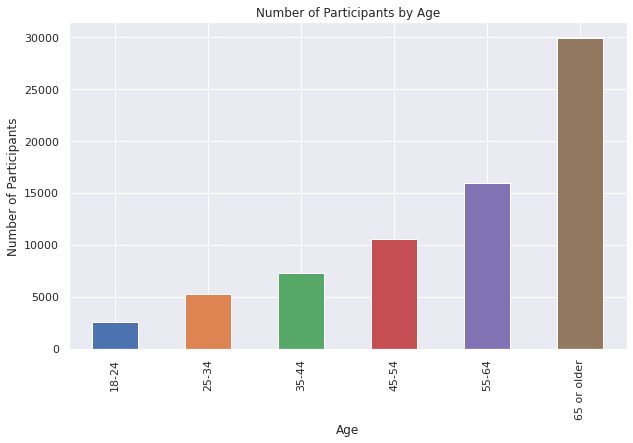

In [42]:
#check frequency of ages
ax = final_df.groupby(['_AGE_G']).size().plot(kind='bar', figsize=(10,6), title="Number of Participants by Age",color=['C0', 'C1', 'C2','C3','C4','C5'])
ax.set_xlabel("Age")
ax.set_ylabel("Number of Participants")
ax.set_xticklabels(['18-24','25-34','35-44','45-54','55-64','65 or older'])

In [43]:
#PLOTTING WITH SEABORN

#I preferred plotting direclty from the dataframe so I will keep the above plot.
#d = final_df.groupby(['_AGE_G']).size()
#ax = sns.barplot(x=d.index, y=d.values)
#ax.set(title = "This is the title")
#ax.set_xlabel("Age")
#ax.set_ylabel("Number of Participants")
#ax.set_xticklabels(['18-24','25-34','35-44','45-54','55-64','65 or older'])

In [44]:
#Function that can calculate the percentage for the pie chart
#final_df.groupby(['_SEX']).size()
#final_df._SEX.value_counts()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0, 0.5, '')

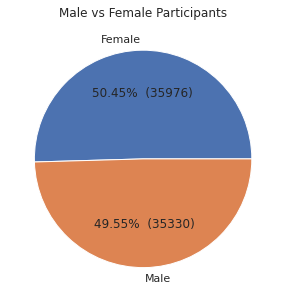

In [45]:
#create pie chart showing male vs females
#The ratio between male and female is fairly balanced and this is good
ax = final_df._SEX.value_counts().plot(kind='pie', figsize=(10,5), autopct=make_autopct(final_df._SEX.value_counts()), title='Male vs Female Participants', labels=['Female', 'Male'])
ax.set_ylabel('')

In [46]:
final_df.columns

Index(['DIABETE4', '_AGE_G', '_RACE', '_SEX', 'EDUCA', 'INCOME2', 'MARITAL',
       'GENHLTH', 'PHYSHLTH', 'HLTHPLN1', '_SMOKER3', '_RFBING5', '_TOTINDA',
       'MEDCOST', '_RFBMI5', '_MICHD'],
      dtype='object')

In [47]:
#Make the columns more readable
#[DIABETE4: _AGE_G:RACE:_SEX:EDUCA:INCOME2:MARITAL:GENHLTH:PHYSHLTH:HLTHPLN1:_SMOKER3:_RFBING5:_TOTINDA:MEDCOST:_RFBMI5:_MICHD]
columns_rename = ['Diabetes','Age','Race','Birth_Sex','Education','Income','Marital','General_Health','Physical_Health','Health_Coverage','Smoker','Drinker','Physical_Activity','Medical_Cost','Overweight','Heart_Disease']
final_df = final_df.set_axis(columns_rename, axis='columns')
print(final_df.columns)

Index(['Diabetes', 'Age', 'Race', 'Birth_Sex', 'Education', 'Income',
       'Marital', 'General_Health', 'Physical_Health', 'Health_Coverage',
       'Smoker', 'Drinker', 'Physical_Activity', 'Medical_Cost', 'Overweight',
       'Heart_Disease'],
      dtype='object')


In [48]:
#check dataframe
final_df.head()

,Diabetes,Age,Race,Birth_Sex,Education,Income,Marital,General_Health,Physical_Health,Health_Coverage,Smoker,Drinker,Physical_Activity,Medical_Cost,Overweight,Heart_Disease
0,1.0,5.0,1.0,0.0,6.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
5,1.0,6.0,1.0,1.0,4.0,5.0,4.0,4.0,20.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
11,1.0,6.0,1.0,0.0,5.0,4.0,3.0,3.0,5.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0
17,1.0,6.0,1.0,1.0,6.0,7.0,1.0,2.0,0.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
23,1.0,6.0,2.0,0.0,4.0,2.0,3.0,4.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0


In [97]:
# We have predominantly categorical values. However, for Physical_Health which is the number of days the respondent is not in good health for the past 30 days, I can check
# if there is a correlation with having diabetes.
temp_df = final_df[['Diabetes', 'Physical_Health']]
temp_df.corr()
corr
#There is a positive relationship between diabetes and physical health but it is weak.
#I expected a stronger relationship.


,Diabetes,Physical_Health
Diabetes,1.000000,0.200256
Physical_Health,0.200256,1.000000


In [99]:
#Looking on the data to eye ball the relationship between the number of days physical health was not good and a person not having diabetes
temp_df.sample(20)

,Diabetes,Physical_Health
194150,1.0,3.0
224784,1.0,0.0
45304,1.0,0.0
189371,0.0,2.0
124396,1.0,3.0
121066,1.0,30.0
150670,1.0,0.0
142570,0.0,0.0
396660,1.0,0.0
302555,0.0,0.0


In [109]:
#Physical Health is number of days during pass 30 days that  your physical health was not good.
temp_df_health = temp_df.groupby('Physical_Health')['Diabetes'].apply(lambda x: x[x == 0.0].count())
temp_df_health.head()

Physical_Health
0.0    25922
1.0     1259
2.0     1644
3.0      935
4.0      491
Name: Diabetes, dtype: int64

Text(0, 0.5, 'Number of Participants not Having Diabetes')

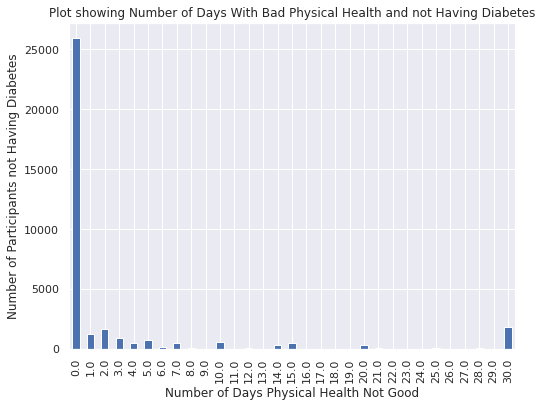

In [111]:
#Plotting dataframe above
ax = temp_df_health.plot(kind='bar',figsize=(8,6), title="Plot showing Number of Days With Bad Physical Health and not Having Diabetes")
ax.set_xlabel("Number of Days Physical Health Not Good")
ax.set_ylabel("Number of Participants not Having Diabetes")
#Here I see that zero days of bad physical health actually correlates not having the disease also 1,2 and 3 days.
#There are a few strange behaviours especially at 30 days, where an increase is actually reflected.

**NB:** Before moving on to exploring different ML models, I Would normally scale values at this point, but not so necessary as the scales are mostly comparable since they are mostly categorical.

## 4. Train, Explore and Evaluate Different Models

In [53]:
#Separate dataset into labels and features. Label is the diabetes column
X = np.array(final_df.drop(['Diabetes'], axis=1))
y = np.array(final_df['Diabetes'])


In [54]:
#split dataset into training and testing for models
#can add random_state=<some value>. This would ensure we get the same sets each time
#70% for the train and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=10)

In [55]:
#next step is to train our model. We need to test a few and see which one we can focus on to use 
#and improve.
#Since it's a classifcation problem, there are a number of models that we can check.
#We will check the four below

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [56]:
#We can now store the model objects in an array so we can process them in a loop
models = []

models.append(('RFC', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))

In [57]:
#The model_selection utility provides  a way how I can score and compare our models
from sklearn import model_selection
#I need a structure to store the results and the model names. A dictionary can be used for this.
#A random_state value is also used to ensure we can repeat our test with the same results
results={}
timers = {}
for name, model in models:
    start = time.time()
    kfold = model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
    score_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    final_time = end - start
    results[name] = str(round(score_results.mean()*100)) + "% (" + str(round(final_time)) + " seconds)" 
    
    
for key, value in results.items():
    print("%s => %s " % (key,value))
#LogisticRegression gave the best score of 73%, so I will see if I can optimize its parameters in the next section

RFC => 71% (26 seconds) 
LR => 73% (2 seconds) 
KNN => 69% (6 seconds) 
GNB => 71% (0 seconds) 


## 5. Choose Model and perform hyperparameter tuning

In [58]:
#I can use GridSearchCV to build a grid and see what would be the best combination parameters for support vector since
#it gave use the highest score
# I also need to check the parameters for support vector
# Have to look at documentation to see options for the values
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
#I use the code below to get the keys that we can use.
#I had to also go to the documentation to see the values I can use
#For now I will just use a few as shown below
lr_model.get_params().keys()


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [59]:
#create a dictionary of parameters to tune
tuned_parameters = {
    'multi_class': ['auto','ovr','multinomial'],
    'C': [1, 10, 50, 100],
    'solver':['newton-cg', 'lbfgs', 'sag', 'saga'], 
    }
gridSearch = GridSearchCV(lr_model, tuned_parameters, cv=10, scoring='accuracy')
gridSearch.fit(X_train, y_train)    

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 50, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [60]:
#Look at the best score from the result
gridSearch.best_score_

0.7290940680404214

In [61]:
#Look at the best parameters
gridSearch.best_params_

{'C': 1, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

In [62]:
#Select the best estimator(model with the best parameters) and store the model
lr = gridSearch.best_estimator_

In [63]:
#Training the model on the best estimator
lr.fit(X_train,y_train)

LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')

In [64]:
#Check the accuracy with out test data
accuracy = lr.score(X_test,y_test)
print("The accuracy of the model on the test set is:  %f" % accuracy)

The accuracy of the model on the test set is:  0.727188


In [65]:
#Predictions on the  test set
Y_predict_test = lr.predict(X_test)

Confusion Matrix :
[[7555 3206]
 [2630 8001]]


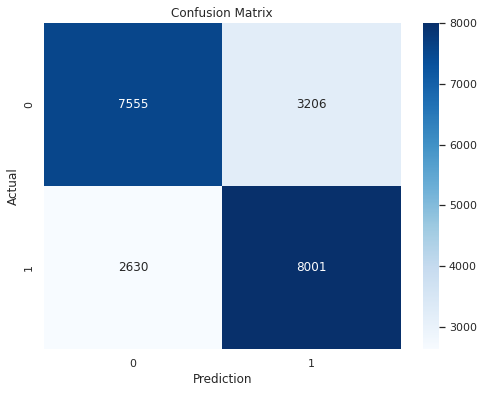

In [66]:
#Look on the confusion matrix
from sklearn.metrics import confusion_matrix 

results_predict = confusion_matrix(y_test, Y_predict_test) 
  
print('Confusion Matrix :')
print(results_predict)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(results_predict, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()


#predicted NO and actual NO in top left (TN)
#Predicted No and actually YES in bottom left (FN)
#Predicted YES and actually NO top right (FP)
#Pedicted YES and actually YES bottom right (TP)

## 6. Conclusion

The model is doing fairly good, but not as good as I hoped. The main diagonal has the highest figures -> TNs and TPs and this is good. However, the FNs and FPs are two high. The next approach that will be taken is to see if we can improve the performance by using an artificial neural network.

In [67]:
#Saving model to disk and saving 
import pickle
pickle.dump(lr, open('my_lr_model.sav','wb'))

In [68]:
#Saving the final dataframe to be used for our deep learning model
#index=False to avoid saving an index which would have an unnamed column when reading in the data
final_df.to_csv('final_df.csv', sep='\t', encoding='utf-8',index=False)
